In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Short4_leads.csv')

In [3]:
import ydata_profiling
profile = df.profile_report()
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86244 entries, 0 to 86243
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  85322 non-null  object
 1   Company               86244 non-null  bool  
 2   Status_Text           85484 non-null  object
 3   Reason_Code_Text      55320 non-null  object
 4   Source_Text           85460 non-null  object
 5   Priority_Text         85483 non-null  object
 6   Start_Date            85483 non-null  object
 7   End_Date              85483 non-null  object
 8   Owner_Party_Name      86244 non-null  object
 9   Sales_Unit_Name       33750 non-null  object
 10  Sales_Territory_Name  42397 non-null  object
dtypes: bool(1), object(10)
memory usage: 6.7+ MB


In [4]:
# 0 값을 가진 행 제거
df = df[df['Status_Text'] != 0]

# label encoding 수행
df['Status_Text'] = df['Status_Text'].apply(lambda x: 1 if x == 'Converted' else 0)

# 결과 출력
print(df['Status_Text'].value_counts())

Status_Text
0    72662
1     6097
Name: count, dtype: int64


In [5]:
y = df['Status_Text']
X = df.drop('Status_Text', axis=1)

In [6]:
y

0        1
1        1
2        0
3        0
4        0
        ..
78754    0
78755    0
78756    0
78757    0
78758    0
Name: Status_Text, Length: 78759, dtype: int64

In [7]:
X

Name  \
0                          High Speed Rotary Application   
1                                           Back-up Ring   
2                                   Holding Ring Samples   
3                                         Metric O-Rings   
4                                         Multiple Parts   
...                                                  ...   
78754  Member Registration Energy Oil & Gas Target Ac...   
78755                                        Web Request   
78756                            Web Request H&M Website   
78757                                        Web Request   
78758                                        Web Request   

      Contact_Information_Job_Title              Source_Text  Start_Date  \
0                             Owner                    Sales   7/22/2017   
1                               NaN                    Sales   7/25/2017   
2                          Engineer                    Sales   7/25/2017   
3                        Purchasing                    Sales   7/25/2017   
4                  Material Planner                    Sales   7/25/2017   
...                             ...                      ...         ...   
78754                      Engineer  Web Member Registration  2021-06-25   
78755                       Jobsøge     Website Contact Form  2023-10-13   
78756                           CEO     Website Contact Form  2023-10-13   
78757                    Purchasing     Website Contact Form  2023-10-14   
78758                       Student     Website Contact Form  2023-10-14   

       Owner_Party_Name                      Sales_Unit_Name  \
0         Linda Burnett                             TSS West   
1      Robert Mcpherson                             TSS West   
2           Todd Conley                             TSS West   
3         Linda Burnett                             TSS West   
4            Cole Price                             TSS West   
...                 ...                                  ...   
78754     Robert Norris  Trelleborg Sealing Solutions UK Ltd   
78755    Jeremy Pearson                                  NaN   
78756     Matthew Reese                                  NaN   
78757     Jocelyn Ayala                                  NaN   
78758    Jeremy Pearson                                  NaN   

                           Sales_Territory_Name  \
0                                NCA - TSS West   
1                                NCA - TSS West   
2                                NCA - TSS West   
3                                NCA - TSS West   
4                                NCA - TSS West   
...                                         ...   
78754            UK1 - UK          Marketing Co   
78755                                       NaN   
78756  HM -TSS Healthcare & Medical Minneapolis   
78757       AD - TSS Aerospace Hub Distribution   
78758                                       NaN   

                                                    Note  
0      Customer Emailed Matt Cole regarding a new hig...  
1      Name: Contact_First_Name Contact_Last_Name\nEm...  
2      First name: Contact_First_Name\nLast name: Con...  
3      8/1/2017: sent customer to a distributor\n\nMe...  
4      First name: Contact_First_Name\nLast name: Con...  
...                                                  ...  
78754  This new contact from an Energy / Oil & Gas ta...  
78755  Uopfordret jobansøgning (TSS Helsingør)\n Back...  
78756  \n What are you looking for?  : Standard tubin...  
78757  Hello, we are looking for product for landing ...  
78758  Hi there, \n\nWould like to purchase a dynamic...  

[78759 rows x 8 columns]

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78759 entries, 0 to 78758
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Name                           78598 non-null  object
 1   Contact_Information_Job_Title  66754 non-null  object
 2   Source_Text                    78759 non-null  object
 3   Start_Date                     78759 non-null  object
 4   Owner_Party_Name               78759 non-null  object
 5   Sales_Unit_Name                30096 non-null  object
 6   Sales_Territory_Name           38544 non-null  object
 7   Note                           77359 non-null  object
dtypes: object(8)
memory usage: 4.8+ MB


In [9]:
from sklearn.preprocessing import LabelEncoder

# label encoding을 적용할 컬럼 리스트
columns_to_encode = ['Name', 'Contact_Information_Job_Title', 'Source_Text', 
                      'Start_Date', 'Owner_Party_Name', 
                      'Sales_Unit_Name', 'Sales_Territory_Name', 'Note']

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 각 컬럼에 대해 label encoding 수행
for column in columns_to_encode:
    # 해당 컬럼이 결측치를 포함하고 있다면, 결측치를 채우고 label encoding 수행
    if X[column].isnull().any():
        X[column] = X[column].fillna('missing_value')  # 결측치를 'missing_value'로 채움
    X[column] = label_encoder.fit_transform(X[column])

# 결과 확인
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78759 entries, 0 to 78758
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Name                           78759 non-null  int64
 1   Contact_Information_Job_Title  78759 non-null  int64
 2   Source_Text                    78759 non-null  int64
 3   Start_Date                     78759 non-null  int64
 4   Owner_Party_Name               78759 non-null  int64
 5   Sales_Unit_Name                78759 non-null  int64
 6   Sales_Territory_Name           78759 non-null  int64
 7   Note                           78759 non-null  int64
dtypes: int64(8)
memory usage: 4.8 MB


In [10]:
X

Name  Contact_Information_Job_Title  Source_Text  Start_Date  \
0      3931                           5212           18        2749   
1      1335                           9657           18        2766   
2      3959                           2339           18        2766   
3      5482                           6226           18        2766   
4      5683                           4657           18        2766   
...     ...                            ...          ...         ...   
78754  5435                           2339           34        1200   
78755  9838                           3714           36        2004   
78756  9854                            905           36        2004   
78757  9838                           6226           36        2005   
78758  9838                           8082           36        2005   

       Owner_Party_Name  Sales_Unit_Name  Sales_Territory_Name   Note  
0                   667               93                   262  13526  
1                   892               93                   262  34202  
2                  1057               93                   262  18990  
3                   667               93                   262   7773  
4                   216               93                   262  18877  
...                 ...              ...                   ...    ...  
78754               893              103                   392  44209  
78755               481              104                   397  44998  
78756               728              104                   191   4811  
78757               502              104                    26  25336  
78758               481              104                   397  27097  

[78759 rows x 8 columns]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=None,
                              random_state=1)

bag = BaggingClassifier(estimator=tree, # this is basically a random forest ...
                        n_estimators=500,
                        max_samples=1.0,
                        max_features=1.0, # especially if we also use this parameter ...
                        bootstrap=True,
                        bootstrap_features=False,
                        random_state=1)

forest = RandomForestClassifier(criterion='entropy', # we also need to say how we want to measure information gain
                                n_estimators=10,
                                random_state=1)

In [13]:
from sklearn.metrics import accuracy_score

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print('Bagging train/test accuracies %.3f/%.3f'
      % (bag_train, bag_test))

forest = forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

forest_train = accuracy_score(y_train, y_train_pred)
forest_test = accuracy_score(y_test, y_test_pred)
print('Random forest train/test accuracies %.3f/%.3f'
      % (forest_train, forest_test))

Decision tree train/test accuracies 1.000/0.920
Bagging train/test accuracies 1.000/0.945
Random forest train/test accuracies 0.992/0.942


In [14]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(max_depth=None,
                                criterion='gini',
                                random_state=0)

In [15]:
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [16]:
fi = clf_dt.feature_importances_

In [17]:
rel_col_idx = fi.argsort()[-2:][::-1]

In [18]:
X.columns[rel_col_idx]

Index(['Note', 'Start_Date'], dtype='object')

In [19]:
for i,x in enumerate(clf_dt.feature_importances_):
    print(X.columns[i], x)

Name 0.09820869469686075
Contact_Information_Job_Title 0.06689755659550477
Source_Text 0.06134976276463628
Start_Date 0.17965285989089308
Owner_Party_Name 0.14399239606773676
Sales_Unit_Name 0.09196041670384
Sales_Territory_Name 0.0723357816109899
Note 0.28560253166953853


Accuracy: 0.9424834941594719
Feature importances: [0.10075685 0.07930656 0.07524579 0.1691731  0.14882946 0.08831316
 0.09931539 0.2390597 ]


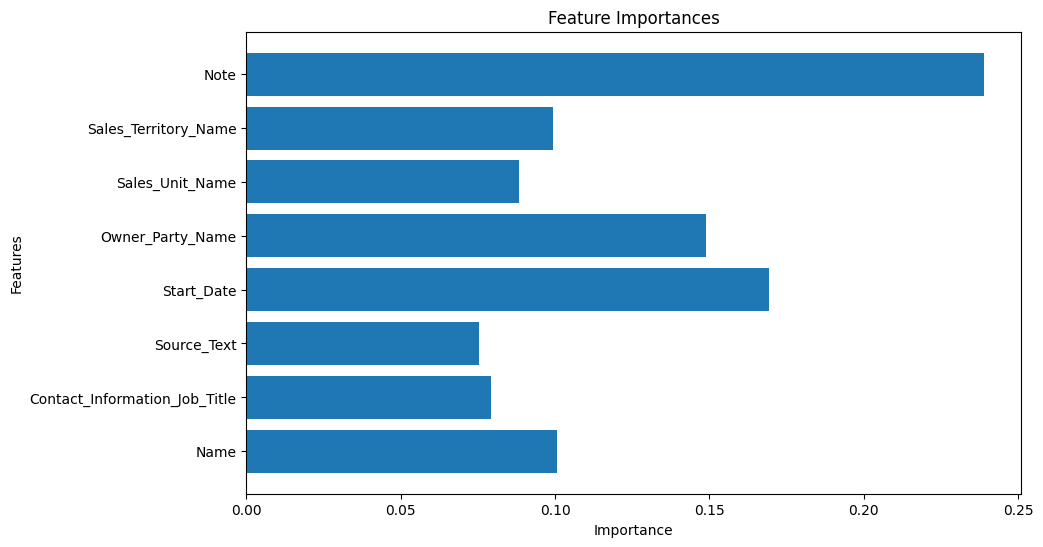

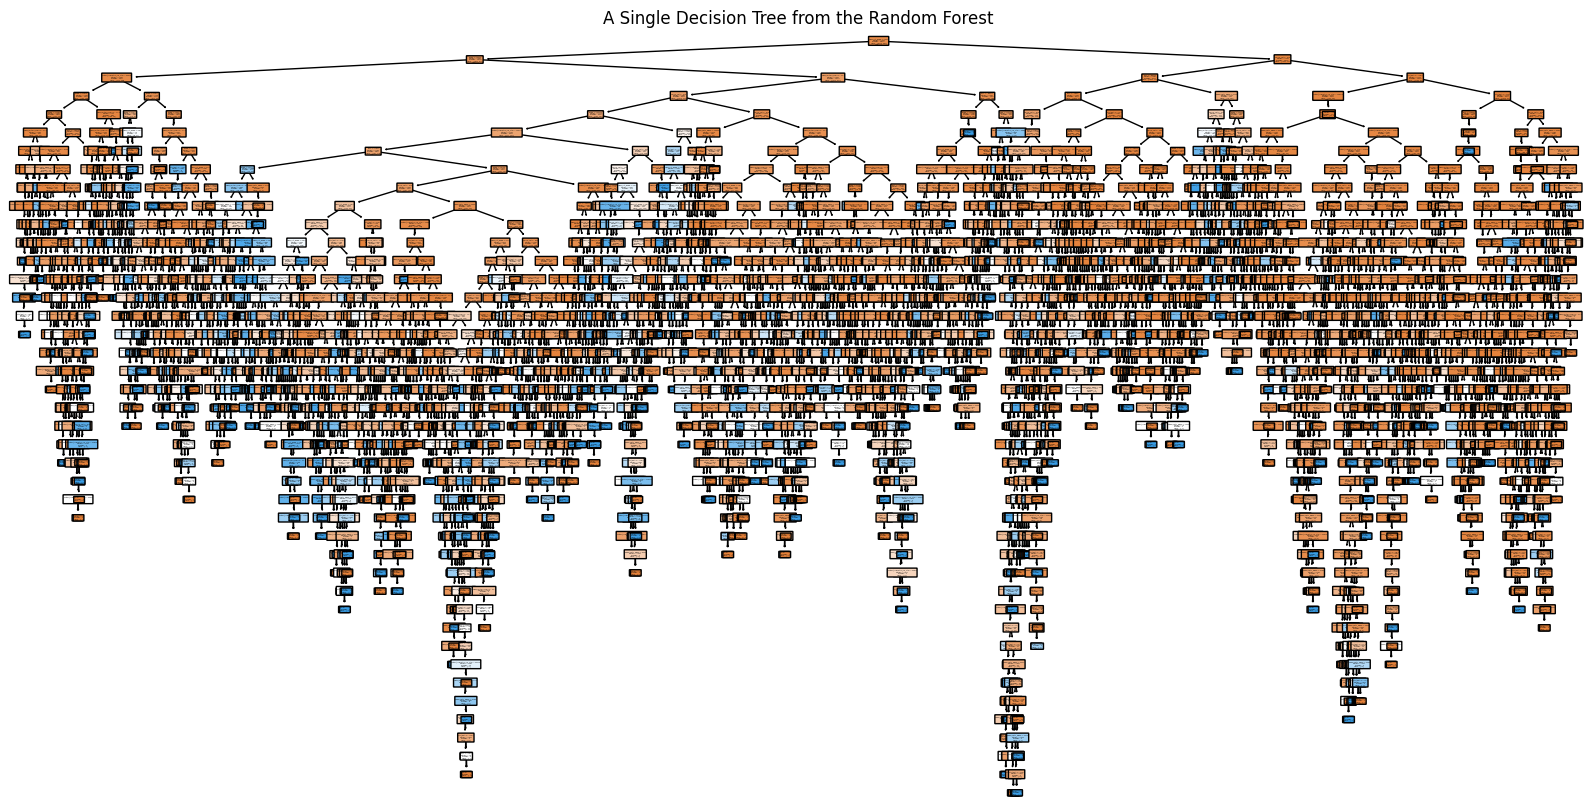

In [20]:
# Importing necessary libraries
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Make predictions on test data
y_pred = forest.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

# Feature importance
print("Feature importances:", forest.feature_importances_)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, forest.feature_importances_)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

# Plotting a single tree from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(forest.estimators_[0], filled=True, feature_names=X.columns, class_names=list(map(str, forest.classes_)), rounded=True)
plt.title('A Single Decision Tree from the Random Forest')
plt.show()
